In [1]:
import pandas as pd
import json
import calendar
from datetime import datetime,date
import nltk
from nltk.corpus import stopwords

In [2]:
with open("messages.json",encoding="utf-8") as f:
    data = json.load(f)


In [3]:

def date_to_day(date):
    date_object = datetime.strptime(date,'%Y-%m-%d').date()
    x = calendar.day_name[date_object.weekday()]
    return x

In [4]:
participants = {}
words_dict = {}
totalmsgs = len(data['messages'])

num = 0
min_word_lenght = 3 #minmum lenght for most used words


#total count of per persons
char_count_dict = {}
word_count_dict = {}
message_list = []


#word count per person per word
person_word_Dict = {}
person_word_list = []

#message of each person
person_msg_dict = {}

#message on each date
date_msg_dict = {}


#total count of messages per hour,date
total_date_dict = {}
total_time_dict = {}


#count of hour,date per person
date_dict = {}
time_dict = {}


#count of day per person
day_dict = {"Monday":{},'Tuesday':{},'Wednesday':{},'Thursday':{},'Friday':{},'Saturday':{},'Sunday':{}}




In [5]:
#main loop
for i in data['messages']:

    #populating Various Dictionarises
    if i['type'] == 'message':
        if i['from'] not in participants:
            participants[i['from']] = 0
            char_count_dict[i['from']] = 0
            word_count_dict[i['from']] = 0
            person_word_Dict[i['from']] = {}
        participants[i['from']] += 1




        if i['date'][0:10] not in total_date_dict:
            total_date_dict[i['date'][0:10]] = 0
            date_dict[i['date'][0:10]] = {}

        if i['from'] not in date_dict[i['date'][0:10]]:
            date_dict[i['date'][0:10]][i['from']] = 0

        total_date_dict[i['date'][0:10]] += 1
        date_dict[i['date'][0:10]][i['from']] +=1





        if i['date'][11:13] not in total_time_dict:
            total_time_dict[i['date'][11:13]] = 0
            time_dict[i['date'][11:13]] = {}

        if i['from'] not in time_dict[i['date'][11:13]]:
            time_dict[i['date'][11:13]][i['from']] = 0

        total_time_dict[i['date'][11:13]] +=1
        time_dict[i['date'][11:13]][i['from']] += 1




        if i['from'] not in day_dict[date_to_day(i['date'][0:10])]:
            day_dict[date_to_day(i['date'][0:10])][i['from']] = 0

        day_dict[date_to_day(i['date'][0:10])][i['from']] +=1




    




    
        
        if type(i['text']) != list:
            message_list.append(i['text'])
            if i['from'] not in person_msg_dict:
                person_msg_dict[i['from']] = []
            person_msg_dict[i['from']].append(i['text'])
            if i['date'][0:10] not in date_msg_dict:
                date_msg_dict[i['date'][0:10]] = []
            date_msg_dict[i['date'][0:10]].append((i['from'],i['text']))
            for j in i['text'].lower().split():
                if j.lower() not in words_dict and len(j)>min_word_lenght:
                    words_dict[j.lower()] = 0

                if j.lower() not in person_word_Dict[i['from']] and len(j)>min_word_lenght:
                    person_word_Dict[i['from']][j.lower()] = 0

                if len(j.lower())> min_word_lenght:
                    words_dict[j.lower()] += 1
                    person_word_Dict[i['from']][j.lower()] += 1
                textToAdd = i['text']

        elif type(i['text']) == list:
            textList = i['text']
            textToAdd = ""
            for text in textList:
                if type(text) == dict:
                    textToAdd += text['text'] + " "
                else:
                    textToAdd += text
            print(textToAdd)
            message_list.append(textToAdd)
            if i['from'] not in person_msg_dict:
                person_msg_dict[i['from']] = []
            person_msg_dict[i['from']].append(textToAdd)
            if i['date'][0:10] not in date_msg_dict:
                date_msg_dict[i['date'][0:10]] = []
            date_msg_dict[i['date'][0:10]].append((i['from'],textToAdd))
            for j in textToAdd.lower().split():
                if j.lower() not in words_dict and len(j)>min_word_lenght:
                    words_dict[j.lower()] = 0

                if j.lower() not in person_word_Dict[i['from']] and len(j)>min_word_lenght:
                    person_word_Dict[i['from']][j.lower()] = 0

                if len(j.lower())> min_word_lenght:
                    words_dict[j.lower()] += 1
                    person_word_Dict[i['from']][j.lower()] += 1


            char_count_dict[i['from']] += len(textToAdd.replace(" ", ""))
            word_count_dict[i['from']] += len(textToAdd.split())



The Ludicrous Hypocrisy of Climate Conferences Continues https://link.theepochtimes.com/mkt_app/the-ludicrous-hypocrisy-of-climate-conferences-continues_4082836.html 
https://www.timescolonist.com/bc-news/bc-doctor-clinically-diagnoses-patient-as-suffering-from-climate-change-4723540 
https://summit.news/2021/11/08/video-al-gores-latest-solution-to-climate-change-is-mass-surveillance/ 
https://abcnews.go.com/amp/US/wireStory/college-professor-charged-setting-california-fires-81264091 
What if extreme weather froze your bank account? 

The World Economic Forum’s new mini promo makes it clear that we should expect more failures of infrastructure and financial networks — not just due to cyberattacks, but now also “global warming.”

A remarkably thinly veiled threat to take down society, blame your carbon footprint, justify the #ClimateLockdown .  The lashings will continue until you eat bugs.  “Thank you sir may I have another?” 
https://www.channelnewsasia.com/commentary/climate-anxiety-

In [6]:
print(person_word_Dict)

{'SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏': {'ludicrous': 1, 'hypocrisy': 2, 'climate': 153, 'conferences': 1, 'continues': 3, 'https://link.theepochtimes.com/mkt_app/the-ludicrous-hypocrisy-of-climate-conferences-continues_4082836.html': 1, 'https://www.timescolonist.com/bc-news/bc-doctor-clinically-diagnoses-patient-as-suffering-from-climate-change-4723540': 1, 'https://summit.news/2021/11/08/video-al-gores-latest-solution-to-climate-change-is-mass-surveillance/': 1, 'https://abcnews.go.com/amp/us/wirestory/college-professor-charged-setting-california-fires-81264091': 1, 'what': 30, 'extreme': 3, 'weather': 14, 'froze': 1, 'your': 21, 'bank': 3, 'account?': 1, 'world': 46, 'economic': 25, 'forum’s': 3, 'mini': 2, 'promo': 1, 'makes': 7, 'clear': 2, 'that': 174, 'should': 14, 'expect': 3, 'more': 49, 'failures': 2, 'infrastructure': 3, 'financial': 6, 'networks': 2, 'just': 25, 'cyberattacks,': 1, 'also': 20, '“global': 2, 'warming.”': 1, 'remarkably': 1, 'thinly': 1, 'veiled': 1,

In [7]:
#sorting dictionaries
stop_words = set(stopwords.words('english'))
mostusedwords = sorted(words_dict.items(), key=lambda x:x[1] ,reverse = True)
#mostusedwords = mostusedwords[0:11]

total_date_dict = sorted(total_date_dict.items(), key = lambda x:x[1],reverse=True)

for i in participants:
    dict1 = sorted(person_word_Dict[i].items(),key=lambda x:x[1] , reverse = True)
    wordAndCount = []
    for pair in dict1:
        if pair[0] not in stop_words and 'https' not in pair[0]:
            wordAndCount.append(pair)
        if len(wordAndCount)>10:
            break
    dict1 = dict1[0:10]
    person_word_list.append([i,wordAndCount])





#Output of Stats
print("----:TELEGRAM CHAT STATS:----")
print('Total Messages : ',totalmsgs,
    '\nTotal Words : ', sum(word_count_dict.values()),
    '\nTotal Characters : ' , sum(char_count_dict.values()),
    '\nTotal Days Talked : ',len(total_date_dict),
    '\n  ')
print('-'*100,'\n ')





print("-: Most Used Words :-")
muw_counter = 0
for i in mostusedwords:
    if i[0] not in stop_words:
        print(i[0], '-' ,i[1])
        muw_counter += 1
    if muw_counter > 10:
        break
print()
print('-'*100,'\n ')




print('--: Averages :--')
print("-: Average Message Length :-")
print(str(sum((char_count_dict.values()))/totalmsgs)[0:4],'Characters')
print(str(sum((word_count_dict.values()))/totalmsgs)[0:4],'Words')
print()


print("-: Averages Per Day :-")
print(str(totalmsgs/len(total_date_dict)),'Messages')
print(str(sum(word_count_dict.values())/len(total_date_dict)),'Words')
print(str(sum(char_count_dict.values())/len(total_date_dict)),'Characters')
print('-'*100,'\n')







print('-: Most Active Dates :-')
for i in total_date_dict:
    print(i[0],':',i[1],'messages')
    for k in date_dict[i[0]]:
        print(k,':',date_dict[i[0]][k])
    print()

    num +=1 
    if num == 5:
        break
print()
print('-'*100,'\n')






print('--: Per Person Stats :--')
print()
print('-:Total Messages:-')
for i in participants:
    print(i,':',participants[i])
print()

print('-:Total Words:-')
for i in word_count_dict:
   print(i,":",word_count_dict[i])
print()

print('-:Total Characters:-')
for i in word_count_dict:
   print(i,":",char_count_dict[i])
print('-'*100)


print('-: Averages :-')
print('Average Words Per Message')
for i in word_count_dict:
    print(i,':',str((word_count_dict[i]/participants[i]))[0:4])

print()
print('Average Characters Per Message')
for i in char_count_dict:
    print(i,':',str((char_count_dict[i]/participants[i]))[0:4])


print()
print("-: Averages Per Day :-")
print("Messages")
for i in participants:
    print(i,':',participants[i]//len(total_date_dict))
print()
print("Words")
for i in word_count_dict:
    print(i,':',str((word_count_dict[i]//len(total_date_dict))))
print()
print('Characters')
for i in char_count_dict:
    print(i,':',str((char_count_dict[i]//len(total_date_dict))))
    




print()
print('- : Most Used Words : -')
for i in person_word_list:
    print('- ',i[0],' -')
    for j in i[1]:
        print(j[0], ':',j[1])
    print()




print('-'*100,'\n ')
print('-: Hourly Messages Stats :-')
total_time_dict =  sorted(total_time_dict.items())
for i in total_time_dict:
    print(i[0],':',i[1])
    for j in time_dict[i[0]]:
        print(j,time_dict[i[0]][j])
    print()






print('-'*100,'\n ')
print('-: Weekly Messages Stats :-')
for i in day_dict:
    print(i,'-',sum(day_dict[i].values()))
    for j in day_dict[i]:
        print(j,':',day_dict[i][j])
    print()


----:TELEGRAM CHAT STATS:----
Total Messages :  2394 
Total Words :  44549 
Total Characters :  371944 
Total Days Talked :  656 
  
---------------------------------------------------------------------------------------------------- 
 
-: Most Used Words :-
climate - 500
change - 159
global - 144
people - 126
food - 125
carbon - 120
world - 114
energy - 97
would - 82
like - 67
want - 65

---------------------------------------------------------------------------------------------------- 
 
--: Averages :--
-: Average Message Length :-
155. Characters
18.6 Words

-: Averages Per Day :-
3.649390243902439 Messages
67.91006097560975 Words
566.9878048780488 Characters
---------------------------------------------------------------------------------------------------- 

-: Most Active Dates :-
2024-01-22 : 47 messages
TNanomaly EndTN : 15
SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏 : 7
Henry : 22
Mel : 2
Geoff Smith : 1

2024-02-19 : 39 messages
TNanomaly EndTN : 2
Henry : 19
TChimpo : 13
G

In [8]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF


In [9]:
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text.lower())




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df



In [10]:
df = pd.DataFrame(columns=['person','msg'])
for person in person_msg_dict:
    msg_list = person_msg_dict[person]
    for msg in msg_list:
        df.loc[-1] = [person,msg]
        df.index = df.index + 1
        df = df.sort_index()
print(df.head())

            person                                                msg
0       Mrs Sng YF  He is afraid of being assassinated, winning in...
1            Beans  Most people in sg are just dumb NPCs. Hopeless...
2            Beans                                         Thanks 70%
3  TNanomaly EndTN  🇳🇱 Dutch MEP Rob Roos says "climate change" is...
4  TNanomaly EndTN  Co-founder of Greenpeace, Patrick Moore, expla...


In [11]:
df_date =pd.DataFrame(columns=['date','person','msg'])
for date in date_msg_dict:
    msg_list = date_msg_dict[date]
    for person,msg in msg_list:
        df_date.loc[-1] = [date,person,msg]
        df_date.index = df_date.index + 1
        df_date = df_date.sort_index()
df_date.head()

,date,person,msg
0,2024-02-20,TChimpo,"Note the words ""most"". Most is not binary. L..."
1,2024-02-20,TNanomaly EndTN,"🇳🇱 Dutch MEP Rob Roos says ""climate change"" is..."
2,2024-02-20,TNanomaly EndTN,"Co-founder of Greenpeace, Patrick Moore, expla..."
3,2024-02-20,Henry,Says the person who says “ most large industri...
4,2024-02-20,TChimpo,The world is not binary. Either good or bad. ...


In [12]:
df['processed_msg'] = df['msg'].apply(preprocess_text)
df_date['processed_msg'] = df_date['msg'].apply(preprocess_text)

In [13]:
df.head()

df_date.to_csv('output_date.csv', encoding = 'utf-8-sig')

In [14]:
analyzer = SentimentIntensityAnalyzer()


def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = scores['compound']

    return sentiment
df['sentiment'] = df['processed_msg'].apply(get_sentiment)
df['raw_sentiment'] = df['msg'].apply(get_sentiment)

df
df.to_csv('output.csv', encoding = 'utf-8')


Upon inspection, sentiment analysis works better on raw text than processed text.
This means two things:
1) Better sentiment analysis model is needed for this topic
12) Better preprocessing algorithm is needed for this project

In [15]:
df_date

,date,person,msg,processed_msg
0,2024-02-20,TChimpo,"Note the words ""most"". Most is not binary. L...",note word `` '' . binary . learn english bro
1,2024-02-20,TNanomaly EndTN,"🇳🇱 Dutch MEP Rob Roos says ""climate change"" is...",🇳🇱 dutch mep rob roos say `` climate change ''...
2,2024-02-20,TNanomaly EndTN,"Co-founder of Greenpeace, Patrick Moore, expla...","co-founder greenpeace , patrick moore , explai..."
3,2024-02-20,Henry,Says the person who says “ most large industri...,say person say “ large industry bad ” . pretty...
4,2024-02-20,TChimpo,The world is not binary. Either good or bad. ...,world binary . either good bad . many . last c...
...,...,...,...,...
2271,2021-11-13,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,
2272,2021-11-12,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,
2273,2021-11-08,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,https://www.timescolonist.com/bc-news/bc-docto...,http : //www.timescolonist.com/bc-news/bc-doct...
2274,2021-11-04,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,The Ludicrous Hypocrisy of Climate Conferences...,ludicrous hypocrisy climate conference continu...


In [16]:
df_date

,date,person,msg,processed_msg
0,2024-02-20,TChimpo,"Note the words ""most"". Most is not binary. L...",note word `` '' . binary . learn english bro
1,2024-02-20,TNanomaly EndTN,"🇳🇱 Dutch MEP Rob Roos says ""climate change"" is...",🇳🇱 dutch mep rob roos say `` climate change ''...
2,2024-02-20,TNanomaly EndTN,"Co-founder of Greenpeace, Patrick Moore, expla...","co-founder greenpeace , patrick moore , explai..."
3,2024-02-20,Henry,Says the person who says “ most large industri...,say person say “ large industry bad ” . pretty...
4,2024-02-20,TChimpo,The world is not binary. Either good or bad. ...,world binary . either good bad . many . last c...
...,...,...,...,...
2271,2021-11-13,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,
2272,2021-11-12,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,,
2273,2021-11-08,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,https://www.timescolonist.com/bc-news/bc-docto...,http : //www.timescolonist.com/bc-news/bc-doct...
2274,2021-11-04,SG🇸🇬 The Other Side Of Climate Change 🦃💩🌴⛈🌏,The Ludicrous Hypocrisy of Climate Conferences...,ludicrous hypocrisy climate conference continu...


In [17]:
df_date['datetime'] = pd.to_datetime(df_date['date'])

# Set the datetime as the DataFrame index
df_date.set_index('datetime', inplace=True)


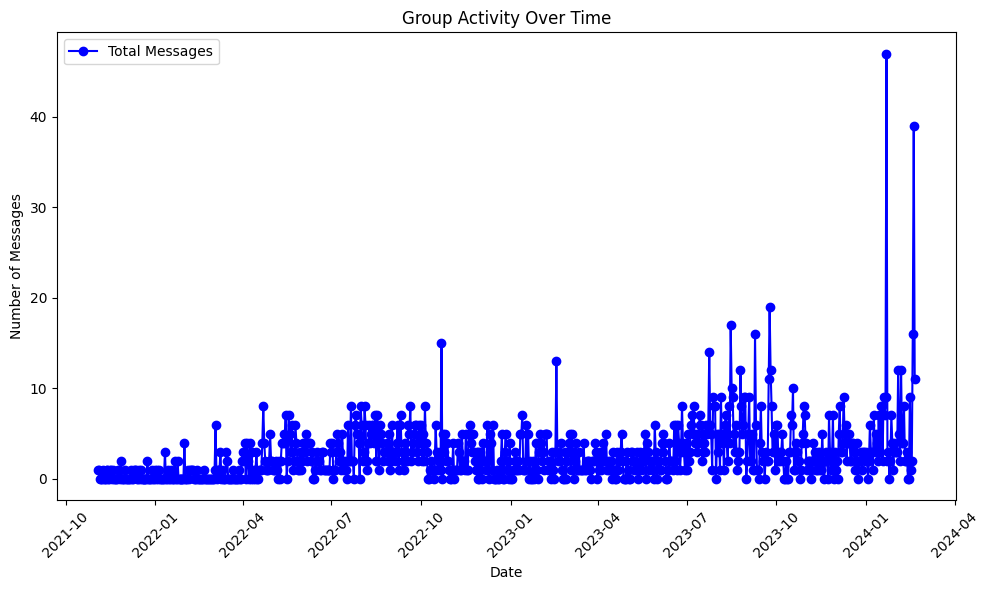

In [18]:
import matplotlib.pyplot as plt
daily_activity = df_date.resample('D').count()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(daily_activity['person'], label='Total Messages', color='blue', marker='o')
plt.title('Group Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Messages')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()